In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
bank = pd.read_csv('mapped_imputed_simulated_transaction_2024.csv')  
# drop the first column
bank = bank.drop(bank.columns[0], axis=1)
bank.drop(['Date', 'Timestamp'], axis=1, inplace=True)
bank.head()

,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,group
0,678330503.0,2971.0,1584.0,NaN,Westport Care Home,2023-01-01 00:00:00,OTHER
1,472213568.0,3792.0,1950.0,NaN,Barbiee Boutique,2023-01-01 00:00:00,Kids Store
2,472213568.0,3012.0,-780.0,283027736.0,NaN,2023-01-01 00:00:00,NaN
3,283027736.0,1787.0,780.0,472213568.0,NaN,2023-01-01 00:00:00,NaN
4,624500124.0,3226.0,1825.0,NaN,Fat Face,2023-01-01 00:00:00,Outdoor Clothing Store


In [20]:
# get coefficient of variation for each Account No

cv = bank.groupby('Account No').agg({'Amount':'std', 'Amount':'mean'}).reset_index()

cv['cv'] = cv['Amount']/cv['Amount'].mean()

cv = cv.sort_values(by='cv', ascending=False)

cv.head()

,Account No,Amount,cv
603,656781737.0,-97.160000,55.464828
844,872874909.0,-94.686154,54.052606
789,824218857.0,-81.826056,46.711282
556,620227043.0,-76.359057,43.590386
808,843174694.0,-73.311398,41.850597


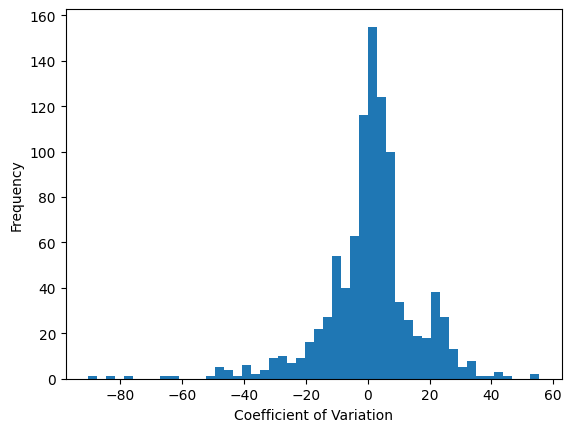

In [21]:
# histogram of coefficient of variation
plt.hist(cv['cv'], bins=50)
plt.xlabel('Coefficient of Variation')
plt.ylabel('Frequency')
plt.show()

In [22]:
bank['DateTime'] = pd.to_datetime(bank['DateTime'], dayfirst=False)

bank.head()

,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,group
0,678330503.0,2971.0,1584.0,NaN,Westport Care Home,2023-01-01,OTHER
1,472213568.0,3792.0,1950.0,NaN,Barbiee Boutique,2023-01-01,Kids Store
2,472213568.0,3012.0,-780.0,283027736.0,NaN,2023-01-01,NaN
3,283027736.0,1787.0,780.0,472213568.0,NaN,2023-01-01,NaN
4,624500124.0,3226.0,1825.0,NaN,Fat Face,2023-01-01,Outdoor Clothing Store


(array([29., 74., 64., 68., 60., 76., 98., 75., 75., 57., 45., 35., 35.,
        30., 25., 18., 14., 13., 16., 17.,  9.,  9.,  5.,  3.,  3.,  1.,
         2.,  7.,  0.,  3.,  0.,  1.,  1.,  1.,  0.,  2.,  1.,  0.,  0.,
         0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 11.37519758,  15.28683991,  19.19848224,  23.11012457,
         27.0217669 ,  30.93340923,  34.84505156,  38.75669389,
         42.66833622,  46.57997855,  50.49162088,  54.40326321,
         58.31490554,  62.22654787,  66.1381902 ,  70.04983253,
         73.96147486,  77.87311719,  81.78475952,  85.69640185,
         89.60804418,  93.51968651,  97.43132884, 101.34297117,
        105.2546135 , 109.16625583, 113.07789816, 116.98954049,
        120.90118282, 124.81282515, 128.72446748, 132.63610981,
        136.54775214, 140.45939447, 144.3710368 , 148.28267913,
        152.19432146, 156.10596379, 160.01760612, 163.92924845,
        167.840890

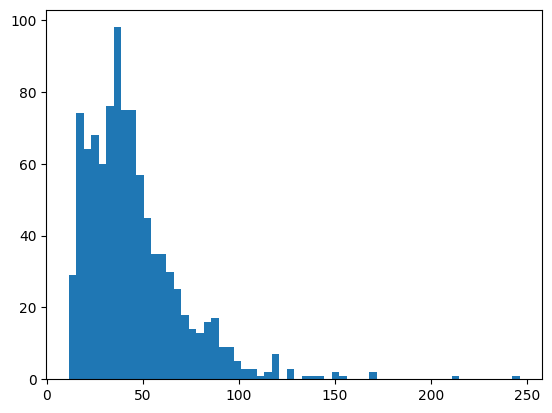

In [31]:
df = bank.sort_values(['Account No','DateTime'])


# get the time difference between transactions
df['TimeDiff'] = df.groupby('Account No')['DateTime'].diff().dt.total_seconds()

# get the mean time difference between transactions
average_time_between_transactions = df.groupby('Account No')['TimeDiff'].mean()

# convert to hours
average_time_between_transactions = average_time_between_transactions/3600

# histogram of average time between transactions
plt.hist(average_time_between_transactions, bins=60)